In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [77]:
data = pd.read_csv('iris.csv')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [78]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [79]:
flowers = {0: 'setosa', 1: 'virgincolor', 2: 'virginica'}
data['target'] = data['target'].map(flowers) #permet de remplacer. Il fait le lien entre la valeur et la destination
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Repérage des cellules manquantes. Si il y en a

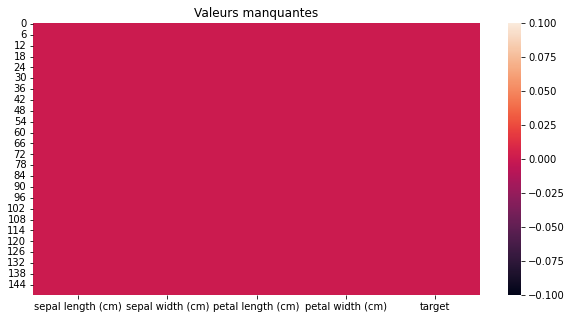

In [80]:
plt.figure(figsize=(10,5))
plt.title("Valeurs manquantes")
sns.heatmap(data.isnull(), cbar=True) #cbar = color bar
plt.show()

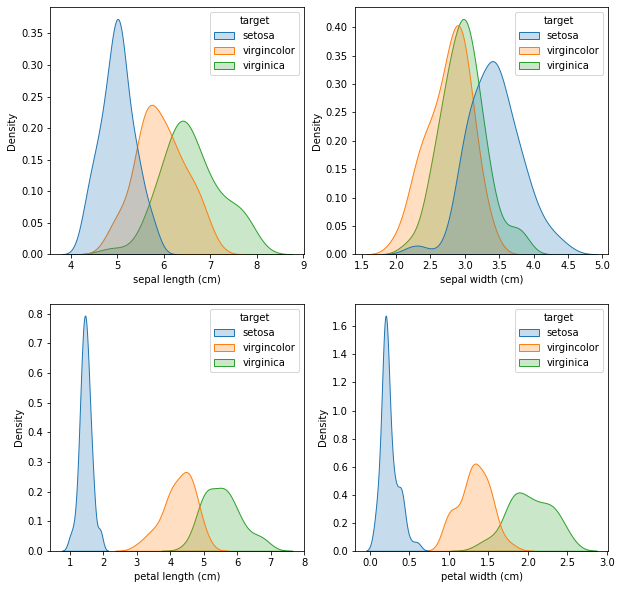

In [81]:
#data.describe()
plt.figure(figsize=(10,10))#taille de la figure
plt.title("Caractéristique des données")

for i, col in enumerate(data.select_dtypes(float)): 
    plt.subplot(2, 2, i+1)#i pour savoir ou mettre le plot. figure de 2 x 2 deux verticales et deux horizontal

    #sns.boxplot(data=data, x='target', y=col) #boxplot

    sns.kdeplot(data = data, x=col, fill=True, hue='target')

plt.show()


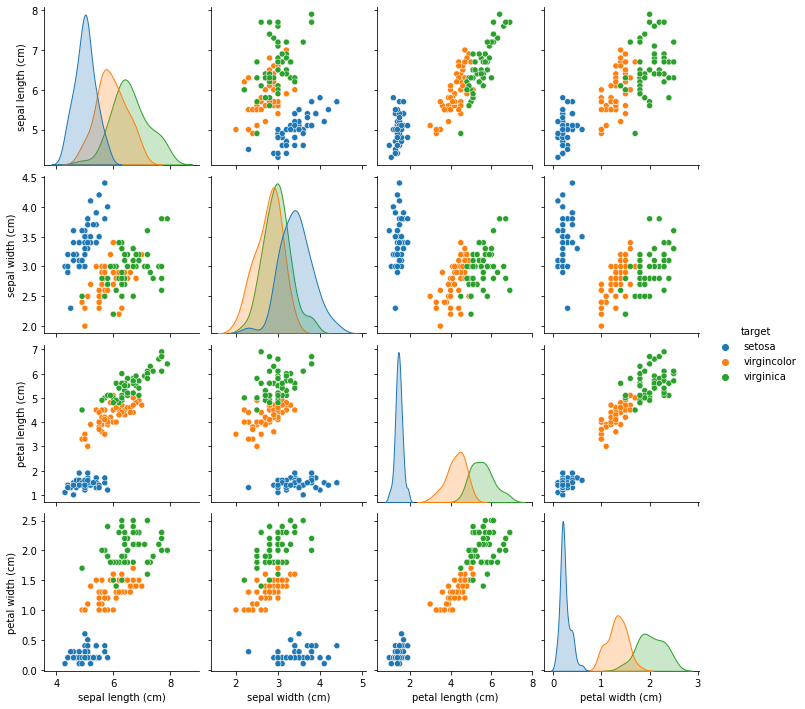

In [82]:
sns.pairplot(data = data, hue='target')
plt.show()

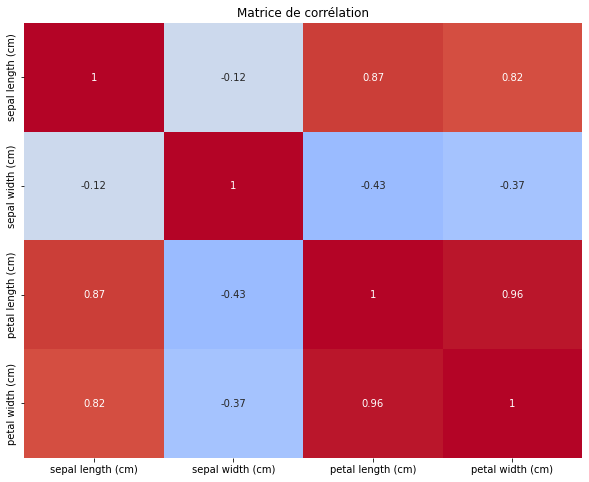

In [83]:
plt.figure(figsize=(10, 8))#taille de la figure
plt.title('Matrice de corrélation')
sns.heatmap(

    data.corr(),
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    cbar=False,
    annot=True

)

plt.show()

In [84]:
#IRIS - Entrainement d'un modèle de classification

In [85]:
#dataframes et affichage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#préparation des données
from sklearn.preprocessing import StandardScaler #de cette librarie on récupère standardScaler pour aligner les ordres de grandeurs des différentes entrées (autour de 0) de manière à les rendres comparables. Donc la moyenne et l'écart type
from sklearn.impute import KNNImputer #si cela avait été nécessaire, complète les valeurs manquantes en se basant sur les k voisins les plus proches (les k lignes les plus semblables en valeur)(fait appel à une notre de ML, le clustering)
from sklearn.feature_selection import SelectKBest #sélectionne les colonnes les plus "importantes"

#gestion de l'entrainement 
from sklearn.pipeline import make_pipeline #Objet de base sklearn pour faciliter l'écriture du programme 
from sklearn.model_selection import train_test_split, GridSearchCV #Sépare les données entrainement-test, surprise pour le second

#modèle à entrainer -> arbre de décision
from sklearn.tree import DecisionTreeClassifier, plot_tree

#tester la précision du modèle
from sklearn.metrics import accuracy_score


Début des hostilités

In [86]:
data = pd.read_csv('iris.csv')

#séparation entrées (ce qui est donnée au modèle) et sorties (ce qui est prédit par le modèle)
X = data.drop(columns='target') #colonne d'entrée(du modèle) (ce qu'on sait) sauf target
Y = data['target'] #colonne de sortie qui est ce qui sera prédit

#séparation entre données d'entraienement et de tests
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=1) #sorties de notre fonction

print(X_train.shape)
print(Y_train.shape)

(112, 4)
(112,)


In [87]:
#On définit les étapes dans un objet unique (et pratique)
pipy = make_pipeline(KNNImputer(),
                    SelectKBest(k=3),#trois premières colonnes
                    StandardScaler(),
                    DecisionTreeClassifier(max_depth=3, criterion='gini'))#3 questions maximum. comment choisir la q la plus interessante à poser (criterion)

In [88]:
#magie!
pipy.fit(X_train, Y_train)

Pipeline(steps=[('knnimputer', KNNImputer()), ('selectkbest', SelectKBest(k=3)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

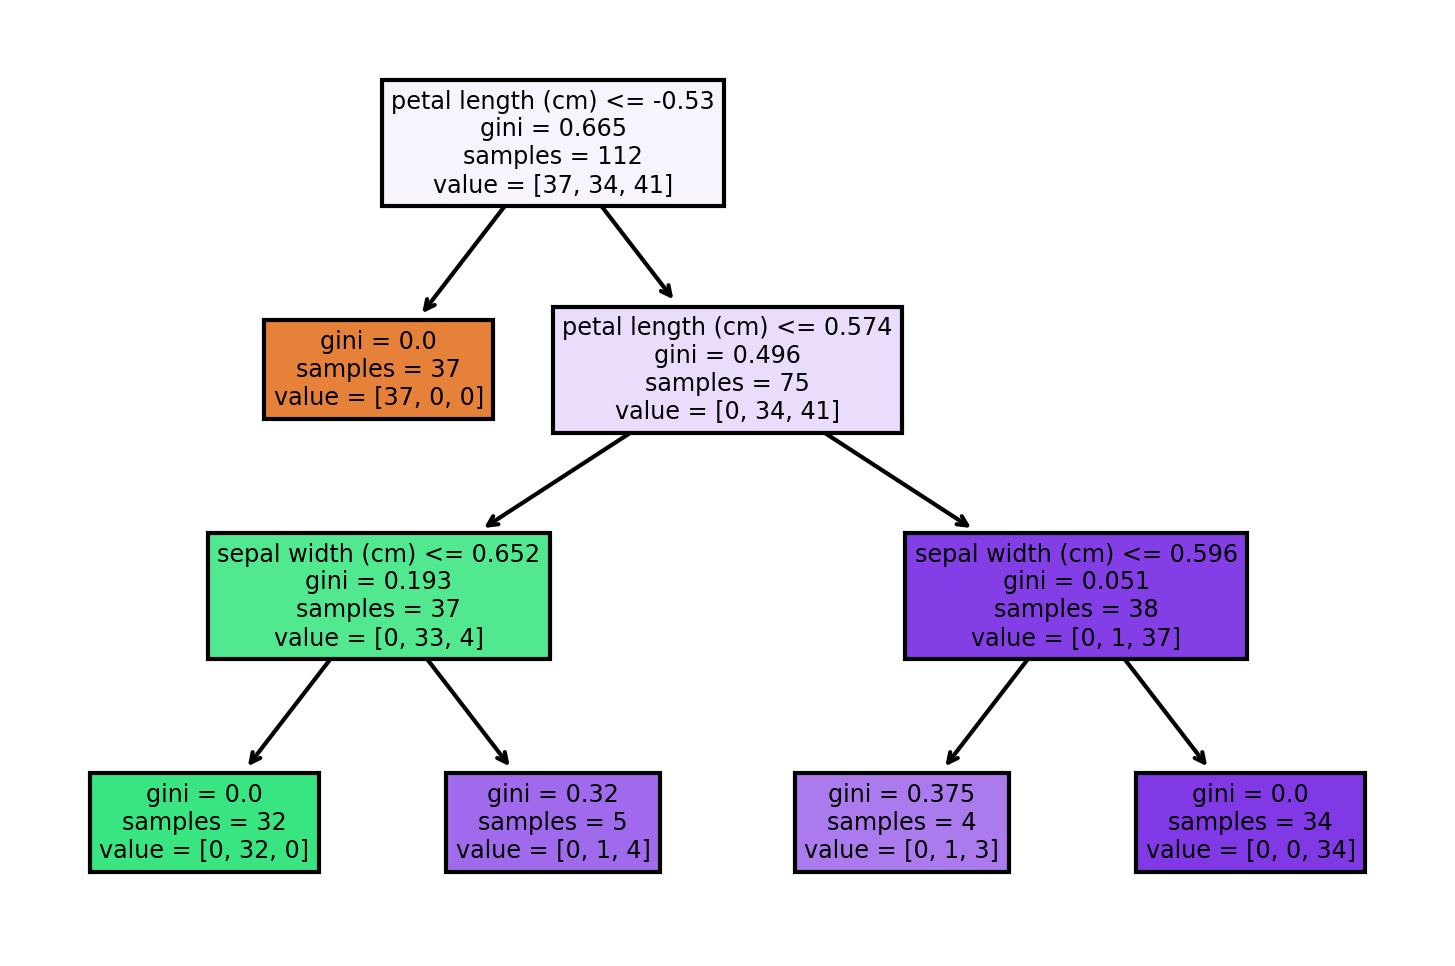

In [89]:
#Affichage de l'abre entrainer
plt.figure(dpi=300)
plot_tree(pipy[3], feature_names=X.columns, filled=True)
plt.savefig('arbre.png')

In [90]:
#Tester les capacités de prédictions (précisions pour nouvelles données) #combien de fois il a eu raison

Y_test_pred = pipy.predict(X_test)
accuracy_score(Y_test, Y_test_pred) #score de précision

0.9736842105263158

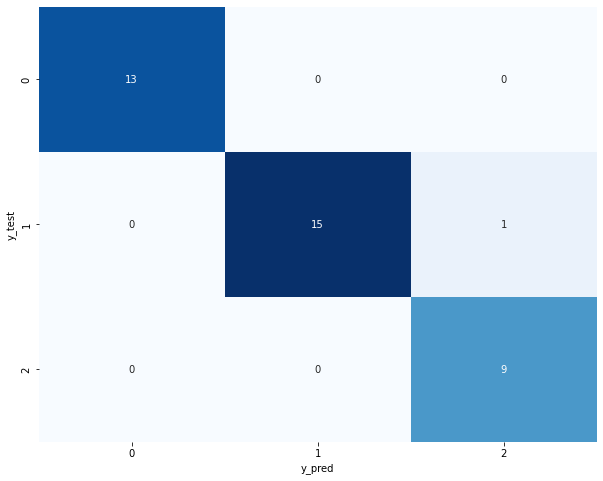

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

Recherche des meilleurs (hyper-)paramètres pour nos modèles 

In [92]:
best_pipy = make_pipeline(
                    KNNImputer(),
                    SelectKBest(),#trois premières colonnes
                    StandardScaler(),
                    DecisionTreeClassifier())#3 questions maximum. comment choisir la q la plus interessante à poser (criterion)

params = {
    'selectkbest__k' : [1, 2, 3, 4],
    'decisiontreeclassifier__criterion' : ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth' : [1, 2, 3, 4]
}

gridy = GridSearchCV(best_pipy, param_grid = params, verbose=1)
gridy.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('selectkbest', SelectKBest()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [1, 2, 3, 4],
                         'selectkbest__k': [1, 2, 3, 4]},
             verbose=1)

In [93]:
pd.DataFrame(gridy.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004743,0.000695,0.002034,0.000453,gini,1,1,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
1,0.003902,0.000811,0.001810,0.000480,gini,1,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
2,0.004241,0.000600,0.001865,0.000503,gini,1,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
3,0.003644,0.000483,0.001566,0.000298,gini,1,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
4,0.005348,0.002305,0.001520,0.000150,gini,2,1,"{'decisiontreeclassifier__criterion': 'gini', ...",1.000000,0.826087,0.863636,0.954545,0.909091,0.910672,0.062087,13
5,0.004321,0.000753,0.001835,0.000275,gini,2,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
6,0.004926,0.000889,0.001730,0.000441,gini,2,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
7,0.005155,0.001566,0.002222,0.001254,gini,2,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
8,0.005484,0.000722,0.002017,0.000380,gini,3,1,"{'decisiontreeclassifier__criterion': 'gini', ...",1.000000,0.826087,0.863636,0.954545,0.909091,0.910672,0.062087,13
9,0.005404,0.001177,0.002011,0.000410,gini,3,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.956522,0.863636,1.000000,0.818182,0.918972,0.067240,6


In [94]:
true_best_pipy = gridy.best_estimator_
#true best pipy peut servir à faire des prédictions